In [314]:
!git clone https://github.com/jbrownlee/Datasets.git

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [315]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [316]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [317]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df = pd.read_csv("/content/Datasets/oil-spill.csv")

In [318]:
num_zeros = (df.iloc[:, 49] == 0).sum()
num_ones = (df.iloc[:, 49] == 1).sum()
print(num_zeros, num_ones, num_zeros/num_ones)

896 40 22.4


In [319]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

##Duplicating

In [320]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Duplicate the DataFrame exactly 2x
df_2x = pd.concat([df, df_copy])

# Duplicate the DataFrame exactly 5x
df_list = [df] * 5
df_5x = pd.concat(df_list)

# Duplicate the DataFrame exactly 10x
df_list = [df] * 10
df_10x = pd.concat(df_list)

##Train Test Split for all datasets

In [321]:
# Split the dataset into features and labels
X = df.drop(df.columns[49], axis=1)
y = df[df.columns[49]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#------------------------------------2X-----------------------------------
X_2x = df_2x.drop(df_2x.columns[49], axis=1)
y_2x = df_2x[df_2x.columns[49]]

X_train_2x, X_test_2x, y_train_2x, y_test_2x = train_test_split(X_2x, y_2x, test_size=0.2)


#------------------------------------5X-----------------------------------
X_5x = df_5x.drop(df_5x.columns[49], axis=1)
y_5x = df_5x[df_5x.columns[49]]

X_train_5x, X_test_5x, y_train_5x, y_test_5x = train_test_split(X_5x, y_5x, test_size=0.2)


#------------------------------------10X-----------------------------------
X_10x = df_10x.drop(df_10x.columns[49], axis=1)
y_10x = df_10x[df_10x.columns[49]]

X_train_10x, X_test_10x, y_train_10x, y_test_10x = train_test_split(X_10x, y_10x, test_size=0.2)

#**Standard Random Forest Classifier**

In [322]:
from sklearn.ensemble import RandomForestClassifier

#train random forest classifier on the train set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#------------------------------------2X-----------------------------------
rf_2x = RandomForestClassifier()
rf_2x.fit(X_train_2x, y_train_2x)

#------------------------------------5X-----------------------------------
rf_5x = RandomForestClassifier()
rf_5x.fit(X_train_5x, y_train_5x)

#------------------------------------10X-----------------------------------
rf_10x = RandomForestClassifier()
rf_10x.fit(X_train_10x, y_train_10x)

RandomForestClassifier()

In [323]:
# Make predictions on the test set
y_pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)

y_pred_2x = rf_2x.predict(X_test_2x)
accuracy_2x = rf_2x.score(X_test_2x, y_test_2x)

y_pred_5x = rf_5x.predict(X_test_5x)
accuracy_5x = rf_5x.score(X_test_5x, y_test_5x)

y_pred_10x = rf_10x.predict(X_test_10x)
accuracy_10x = rf_10x.score(X_test_10x, y_test_10x)

In [324]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

precision_2x, recall_2x, fscore_2x, support_2x = precision_recall_fscore_support(y_test_2x, y_pred_2x)

precision_5x, recall_5x, fscore_5x, support_5x = precision_recall_fscore_support(y_test_5x, y_pred_5x)

precision_10x, recall_10x, fscore_10x, support_10x = precision_recall_fscore_support(y_test_10x, y_pred_10x)


# Print the evaluation metrics
print("Original:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)
#------------------------------------2X-----------------------------------
print("2x:")
print("Accuracy:", accuracy_2x)
print("Precision:", precision_2x)
print("Recall:", recall_2x)
print("F-score:", fscore_2x)
#------------------------------------5X-----------------------------------
print("5x:")
print("Accuracy:", accuracy_5x)
print("Precision:", precision_5x)
print("Recall:", recall_5x)
print("F-score:", fscore_5x)
#------------------------------------10X-----------------------------------
print("10x:")
print("Accuracy:", accuracy_10x)
print("Precision:", precision_10x)
print("Recall:", recall_10x)
print("F-score:", fscore_10x)

Original:
Accuracy: 0.9680851063829787
Precision: [0.96808511 0.        ]
Recall: [1. 0.]
F-score: [0.98378378 0.        ]
2x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]
5x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]
10x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, '10x')

<Figure size 1296x1152 with 0 Axes>

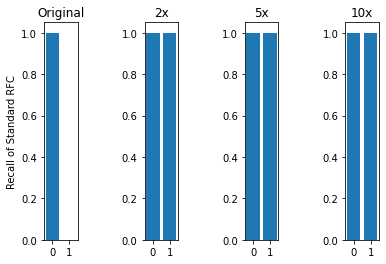

In [325]:
import matplotlib.pyplot as plt

# Set the figure width to 8 inches and the height to 6 inches
plt.figure(figsize=(18, 16))


fig, ax = plt.subplots(nrows=1, ncols=4)
plt.subplots_adjust(wspace=2, hspace=2)


# Get the precision values for each classifier
recall_0 = recall[0]
recall_1 = recall[1]

# Create the first subplot
plt.subplot(1, 4, 1)
plt.bar(["0", "1"], [recall_0, recall_1])
plt.ylabel("Recall of Standard RFC")
plt.title("Original")

#------------------------------------2X-----------------------------------
recall_0_2x = recall_2x[0]
recall_1_2x = recall_2x[1]

# Create the second subplot
plt.subplot(1, 4, 2)
plt.bar(["0", "1"], [recall_0_2x, recall_1_2x])
plt.title("2x")

#------------------------------------5X-----------------------------------
recall_0_5x = recall_5x[0]
recall_1_5x = recall_5x[1]

# Create the third subplot
plt.subplot(1, 4, 3)
plt.bar(["0", "1"], [recall_0_5x, recall_1_5x])
plt.title("5x")

#------------------------------------10X-----------------------------------
recall_0_10x = recall_10x[0]
recall_1_10x = recall_10x[1]

# Create the fourth subplot
plt.subplot(1, 4, 4)
plt.bar(["0", "1"], [recall_0_10x, recall_1_10x])
plt.title("10x")


# **class-weighted RFC**

In [326]:
from sklearn.ensemble import RandomForestClassifier

#train random forest classifier on the train set
class_weights = {0:1, 1:3}
rf = RandomForestClassifier(class_weight=class_weights)
rf.fit(X_train, y_train)

#------------------------------------2X-----------------------------------
rf_2x = RandomForestClassifier(class_weight=class_weights)
rf_2x.fit(X_train_2x, y_train_2x)

#------------------------------------5X-----------------------------------
rf_5x = RandomForestClassifier(class_weight=class_weights)
rf_5x.fit(X_train_5x, y_train_5x)

#------------------------------------10X-----------------------------------
rf_10x = RandomForestClassifier(class_weight=class_weights)
rf_10x.fit(X_train_10x, y_train_10x)

RandomForestClassifier(class_weight={0: 1, 1: 3})

In [327]:
# Make predictions on the test set
y_pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)

y_pred_2x = rf_2x.predict(X_test_2x)
accuracy_2x = rf_2x.score(X_test_2x, y_test_2x)

y_pred_5x = rf_5x.predict(X_test_5x)
accuracy_5x = rf_5x.score(X_test_5x, y_test_5x)

y_pred_10x = rf_10x.predict(X_test_10x)
accuracy_10x = rf_10x.score(X_test_10x, y_test_10x)

In [328]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

precision_2x, recall_2x, fscore_2x, support_2x = precision_recall_fscore_support(y_test_2x, y_pred_2x)

precision_5x, recall_5x, fscore_5x, support_5x = precision_recall_fscore_support(y_test_5x, y_pred_5x)

precision_10x, recall_10x, fscore_10x, support_10x = precision_recall_fscore_support(y_test_10x, y_pred_10x)


# Print the evaluation metrics
print("Original:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)
#------------------------------------2X-----------------------------------
print("2x:")
print("Accuracy:", accuracy_2x)
print("Precision:", precision_2x)
print("Recall:", recall_2x)
print("F-score:", fscore_2x)
#------------------------------------5X-----------------------------------
print("5x:")
print("Accuracy:", accuracy_5x)
print("Precision:", precision_5x)
print("Recall:", recall_5x)
print("F-score:", fscore_5x)
#------------------------------------10X-----------------------------------
print("10x:")
print("Accuracy:", accuracy_10x)
print("Precision:", precision_10x)
print("Recall:", recall_10x)
print("F-score:", fscore_10x)

Original:
Accuracy: 0.973404255319149
Precision: [0.97326203 1.        ]
Recall: [1.         0.16666667]
F-score: [0.98644986 0.28571429]
2x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]
5x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]
10x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]


Text(0.5, 1.0, '10x')

<Figure size 1296x1152 with 0 Axes>

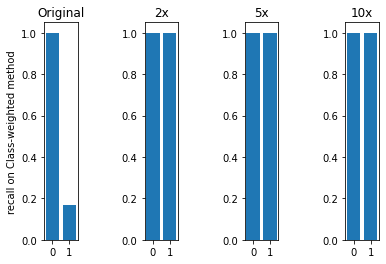

In [329]:
import matplotlib.pyplot as plt

# Set the figure width to 8 inches and the height to 6 inches
plt.figure(figsize=(18, 16))


fig, ax = plt.subplots(nrows=1, ncols=4)
plt.subplots_adjust(wspace=2, hspace=2)


# Get the precision values for each classifier
recall_0 = recall[0]
recall_1 = recall[1]

# Create the first subplot
plt.subplot(1, 4, 1)
plt.bar(["0", "1"], [recall_0, recall_1])
plt.ylabel("recall on Class-weighted method")
plt.title("Original")

#------------------------------------2X-----------------------------------
recall_0_2x = recall_2x[0]
recall_1_2x = recall_2x[1]

# Create the second subplot
plt.subplot(1, 4, 2)
plt.bar(["0", "1"], [recall_0_2x, recall_1_2x])
plt.title("2x")

#------------------------------------5X-----------------------------------
recall_0_5x = recall_5x[0]
recall_1_5x = recall_5x[1]

# Create the third subplot
plt.subplot(1, 4, 3)
plt.bar(["0", "1"], [recall_0_5x, recall_1_5x])
plt.title("5x")

#------------------------------------10X-----------------------------------
recall_0_10x = recall_10x[0]
recall_1_10x = recall_10x[1]

# Create the fourth subplot
plt.subplot(1, 4, 4)
plt.bar(["0", "1"], [recall_0_10x, recall_1_10x])
plt.title("10x")


# **Undersampling RFC**

In [330]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [331]:
from imblearn.ensemble import BalancedRandomForestClassifier

#train random forest classifier on the train set
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)

#------------------------------------2X-----------------------------------
brf_2x = BalancedRandomForestClassifier()
brf_2x.fit(X_train_2x, y_train_2x)

#------------------------------------5X-----------------------------------
brf_5x = RandomForestClassifier()
brf_5x.fit(X_train_5x, y_train_5x)

#------------------------------------10X-----------------------------------
brf_10x = RandomForestClassifier()
brf_10x.fit(X_train_10x, y_train_10x)

RandomForestClassifier()

In [332]:
# Make predictions on the test set
y_pred = brf.predict(X_test)
accuracy = brf.score(X_test, y_test)

y_pred_2x = brf_2x.predict(X_test_2x)
accuracy_2x = brf_2x.score(X_test_2x, y_test_2x)

y_pred_5x = brf_5x.predict(X_test_5x)
accuracy_5x = brf_5x.score(X_test_5x, y_test_5x)

y_pred_10x = brf_10x.predict(X_test_10x)
accuracy_10x = brf_10x.score(X_test_10x, y_test_10x)


In [333]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

precision_2x, recall_2x, fscore_2x, support_2x = precision_recall_fscore_support(y_test_2x, y_pred_2x)

precision_5x, recall_5x, fscore_5x, support_5x = precision_recall_fscore_support(y_test_5x, y_pred_5x)

precision_10x, recall_10x, fscore_10x, support_10x = precision_recall_fscore_support(y_test_10x, y_pred_10x)


# Print the evaluation metrics
print("Original:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)
#------------------------------------2X-----------------------------------
print("2x:")
print("Accuracy:", accuracy_2x)
print("Precision:", precision_2x)
print("Recall:", recall_2x)
print("F-score:", fscore_2x)
#------------------------------------5X-----------------------------------
print("5x:")
print("Accuracy:", accuracy_5x)
print("Precision:", precision_5x)
print("Recall:", recall_5x)
print("F-score:", fscore_5x)
#------------------------------------10X-----------------------------------
print("10x:")
print("Accuracy:", accuracy_10x)
print("Precision:", precision_10x)
print("Recall:", recall_10x)
print("F-score:", fscore_10x)

Original:
Accuracy: 0.8404255319148937
Precision: [0.98717949 0.125     ]
Recall: [0.84615385 0.66666667]
F-score: [0.9112426  0.21052632]
2x:
Accuracy: 0.928
Precision: [1.         0.37209302]
Recall: [0.92479109 1.        ]
F-score: [0.96092619 0.54237288]
5x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]
10x:
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-score: [1. 1.]


Text(0.5, 1.0, '10x')

<Figure size 1296x1152 with 0 Axes>

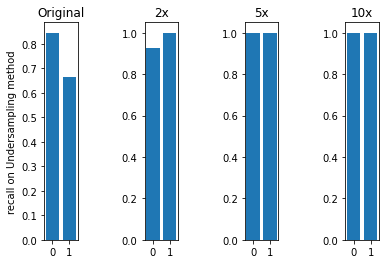

In [334]:
import matplotlib.pyplot as plt

# Set the figure width to 8 inches and the height to 6 inches
plt.figure(figsize=(18, 16))


fig, ax = plt.subplots(nrows=1, ncols=4)
plt.subplots_adjust(wspace=2, hspace=2)


# Get the precision values for each classifier
recall_0 = recall[0]
recall_1 = recall[1]

# Create the first subplot
plt.subplot(1, 4, 1)
plt.bar(["0", "1"], [recall_0, recall_1])
plt.ylabel("recall on Undersampling method")
plt.title("Original")

#------------------------------------2X-----------------------------------
recall_0_2x = recall_2x[0]
recall_1_2x = recall_2x[1]

# Create the second subplot
plt.subplot(1, 4, 2)
plt.bar(["0", "1"], [recall_0_2x, recall_1_2x])
plt.title("2x")

#------------------------------------5X-----------------------------------
recall_0_5x = recall_5x[0]
recall_1_5x = recall_5x[1]

# Create the third subplot
plt.subplot(1, 4, 3)
plt.bar(["0", "1"], [recall_0_5x, recall_1_5x])
plt.title("5x")

#------------------------------------10X-----------------------------------
recall_0_10x = recall_10x[0]
recall_1_10x = recall_10x[1]

# Create the fourth subplot
plt.subplot(1, 4, 4)
plt.bar(["0", "1"], [recall_0_10x, recall_1_10x])
plt.title("10x")
